## Load the dataset

In [51]:
# Reading the data
import pandas as pd
import numpy as np
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy import stats
import re

%matplotlib inline

train_data = pd.read_csv('../shelter-animal-outcomes/test.csv')
sample_sub_data = pd.read_csv('../shelter-animal-outcomes/sample_submission.csv')


In [ ]:
print("Test dataset of shape %s: \n%s  " % (test_data.shape, ', '.join(test_data.columns)))
test_data.head(10)

In [55]:
sample_sub_data.values_count()

AttributeError: 'DataFrame' object has no attribute 'values_count'

In [101]:
sample_sub_data.head()
values = []
train_data.head()
for outcome in sample_sub_data.itertuples():
    if outcome[6] == 1:
        values.append('Transfer')
    if outcome[5] == 1:
        values.append('Return_to_owner')
    if outcome[4] == 1:
        values.append('Euthanasia')
    if outcome[3] == 1:
        values.append('Died')
    if outcome[2] == 1:
        values.append('Adoption')
        
        
train_data['OutcomeType'] = values


In [102]:
train_data['OutcomeType'].value_counts()

Adoption    11456
Name: OutcomeType, dtype: int64

# Convert each column to a normalized format

In [103]:
processedDF = pd.DataFrame() 

### The label Outcome
THe label is the outcome, which is defined in the outcomeType column and sometimes also specified with a OutcomeSubType


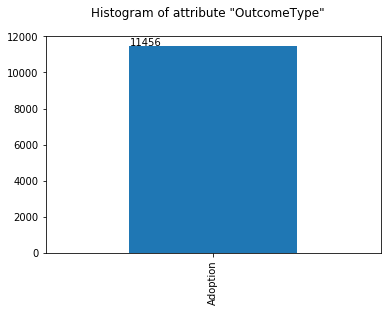

In [104]:
## Preparing the plots

fig = plt.figure()
indexOfColumn = train_data.columns.get_loc('OutcomeType')

## Filling the plots with histograms and boxplots
outcomeTypeData = train_data.iloc[:, indexOfColumn]
ax = outcomeTypeData.value_counts().sort_values(axis='index').plot(kind='bar')

fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))


Text(0.5, 0.98, 'Histogram of attribute "OutcomeType"')

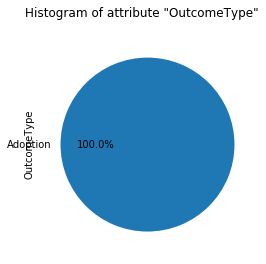

In [105]:
## Preparing the plots

fig = plt.figure()
## Filling the plots with histograms and boxplots
ax = outcomeTypeData.value_counts().sort_values(axis='index').plot(kind='pie', autopct='%1.1f%%')

fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))



In [106]:
print(np.reshape(uniqueTypes[1], (1, 1)))

IndexError: index 1 is out of bounds for axis 0 with size 1

KeyError: 'OutcomeSubtype'

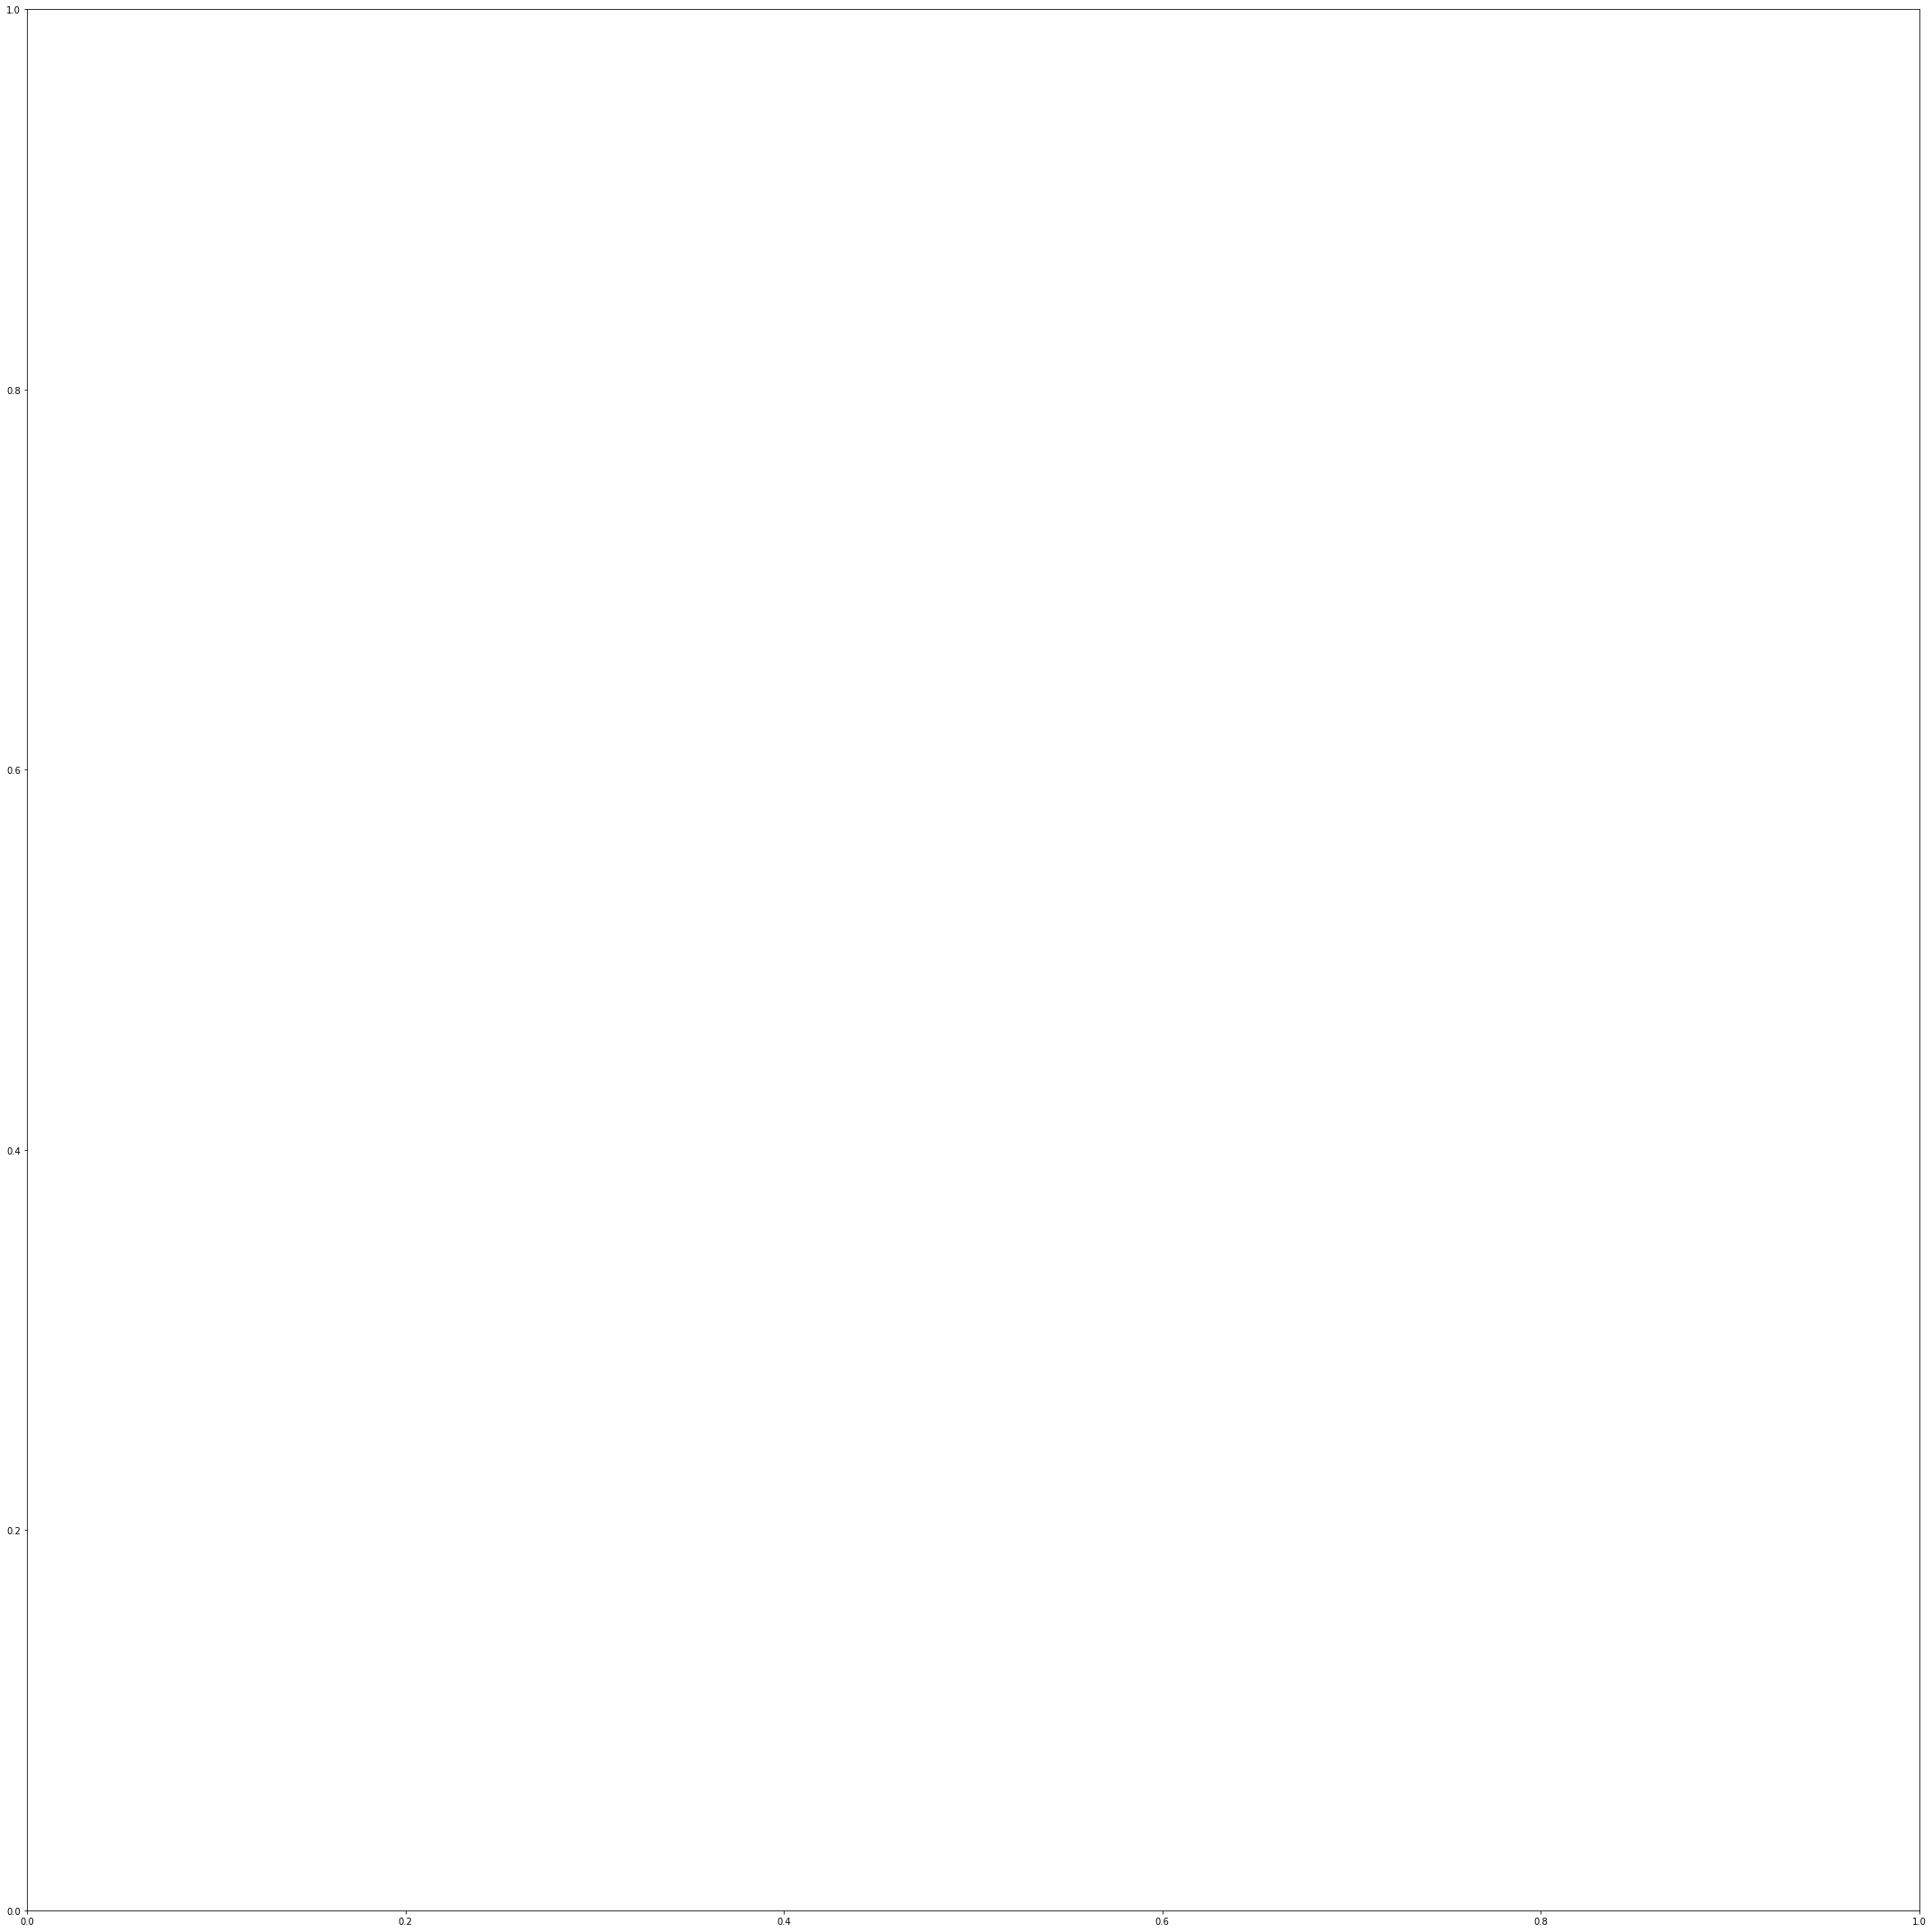

In [65]:
uniqueTypes = train_data.OutcomeType[:].unique()

def concat(row):
    print('-'.join(row.astype(str)))
    return '-'.join(row.astype(str))

fig_pie, ax_pie = plt.subplots(len(uniqueTypes),1, sharey='none', sharex='none',figsize=(30,30))
fig_pie.tight_layout() 
figCount = 0
for type in uniqueTypes:
    typeFilter = train_data['OutcomeType'].str.contains(type, flags=re.IGNORECASE, regex=True)
    subTypes = train_data['OutcomeSubtype'][typeFilter].astype('str')
    valueCounts = np.unique(subTypes, return_counts=True)
    labels = []
    for i in (range(len(valueCounts[0]))):
        labels.append('{0}\n{1}'.format(valueCounts[0][i], valueCounts[1][i]))    

    ax_pie[figCount].pie(valueCounts[1], labels= labels, autopct='%1.1f%%')
    ax_pie[figCount].set_title(type)

    #handles, labels = ax_pie[figCount].axes.get_legend_handles_labels()
    #ax_pie[figCount].legend(handles, labels )

    figCount = figCount + 1
    



## Get a clear view of unique values per column

In [109]:
uniqueValuesPerColumn = []

for i in range(len(train_data.columns)):
    columnmValues = train_data.iloc[:,i]
    uniques = columnmValues.value_counts()
    uniqueValuesPerColumn.append(uniques.size)
    print('Unique values of attribute "{0}": \t \t {1}'.format(train_data.columns[i], uniques.size))


Unique values of attribute "ID": 	 	 11456
Unique values of attribute "Name": 	 	 3712
Unique values of attribute "DateTime": 	 	 10575
Unique values of attribute "AnimalType": 	 	 2
Unique values of attribute "SexuponOutcome": 	 	 5
Unique values of attribute "AgeuponOutcome": 	 	 45
Unique values of attribute "Breed": 	 	 913
Unique values of attribute "Color": 	 	 277
Unique values of attribute "OutcomeType": 	 	 1
Unique values of attribute "dayPart": 	 	 4
Unique values of attribute "isNameFilled": 	 	 2


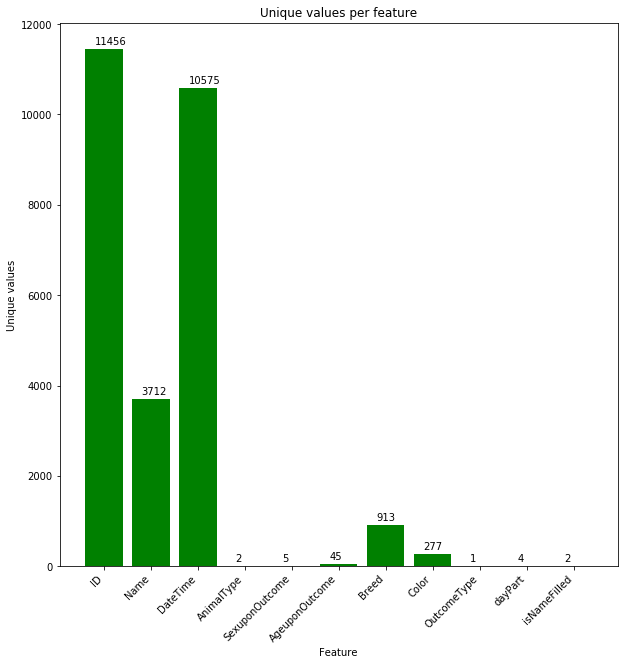

In [110]:
fig = plt.figure(figsize=(10,10))

x_pos = [i for i, _ in enumerate(uniqueValuesPerColumn)]
plt.bar(x_pos, uniqueValuesPerColumn, color='green')
plt.ylabel("Unique values")
plt.xlabel("Feature")
plt.title("Unique values per feature")

plt.xticks(x_pos, train_data.columns)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

ax = plt.gca()

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + 0.2, p.get_height() + 100))


plt.show()

The animal Id is useless in our case. The datetime contains the second most unique values, however this is an interval value and therefor unique values are no issue. The high cardinality of the nomanimal values of breed and color can be bigger issue.  

In [117]:
def dayPartOfArrivial(date):
    hour = date.split(' ')[1].split(':')[0]
    hour = int(hour)
    if (hour > 5) & (hour < 12):
        return 1
    elif (hour > 11) & (hour < 18):
        return 2
    elif (hour > 17) & (hour < 23):
        return 3
    else:
        return 0
    
def workingShifts(date):
    hour = date.split(' ')[1].split(':')[0]
    hour = int(hour)
    if (hour >= 9) & (hour < 17):
        return 1
    elif (hour >= 17) & (hour < 23):
        return 2
    elif (hour >= 0) & (hour < 9):
        return 0
    
def quarters(date):
    hour = date.split(' ')[1].split(':')[0]
    minutes = int(date.split(' ')[1].split(':')[1])
    value = (int(hour) )
    if(minutes >= 15 and minutes < 30 ):
        value = value + 0.25
    elif(minutes >= 30 and minutes < 45 ):
        value = value + 0.5
    elif(minutes >= 45 and minutes <= 59 ):
        value = value + 0.75
    return  value

def hours(date):
    hour = date.split(' ')[1].split(':')[0]
    return int(hour)

def minutes(date):
    hour = date.split(' ')[1].split(':')[0]
    minutes = date.split(' ')[1].split(':')[1]

    return int(hour) + int(minutes)/60

def updateToPercentage(row):
    newRow = pd.Series()
    newRow['Adoption'] = ((row['Adoption']/ row.sum())*100)
    #newRow['Died'] = (row['Died']/ row.sum()*100)
    #newRow['Return_to_owner'] = (row['Return_to_owner']/ row.sum()*100)
    #newRow['Transfer'] = (row['Transfer']/ row.sum()*100)
    #newRow['Euthanasia'] =  (row['Euthanasia']/ row.sum()*100)
    
    return newRow;

Text(0.5, 0, 'Time rounded to minutes')

<Figure size 1440x1440 with 0 Axes>

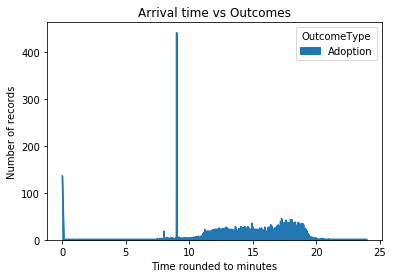

In [118]:
plt.figure(figsize=(20,20))
train_data['dayPart'] = train_data.DateTime.apply(minutes)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)
dayPart.plot(kind='area', title = 'Arrival time vs Outcomes', logy=False, logx=False)

plt.ylabel("Number of records")
plt.xlabel("Time rounded to minutes")

([<matplotlib.axis.XTick at 0x2527705c4a8>,
 <a list of 24 Text xticklabel objects>)

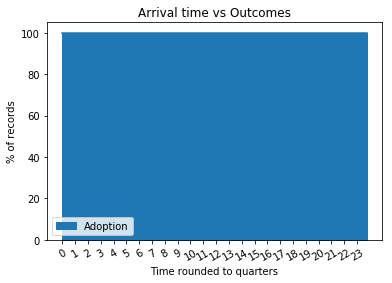

In [119]:
train_data['dayPart'] = train_data.DateTime.apply(quarters)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)

dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')
dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')
plt.ylabel("% of records")
plt.xlabel("Time rounded to quarters")
plt.xticks(range(24))

([<matplotlib.axis.XTick at 0x2527718bb70>,
 <a list of 24 Text xticklabel objects>)

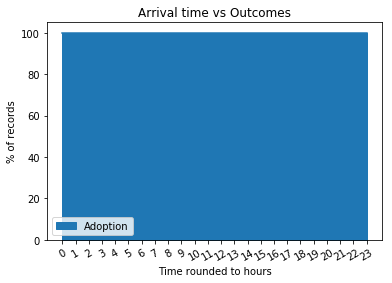

In [120]:
train_data['dayPart'] = train_data.DateTime.apply(hours)
dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack().fillna(0)
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')

dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')
ax = plt.gca()

plt.ylabel("% of records")
plt.xlabel("Time rounded to hours")

plt.xticks(range(24))

         Adoption
dayPart          
0.0         100.0
1.0         100.0
2.0         100.0


[None, None, None, None, None, None]

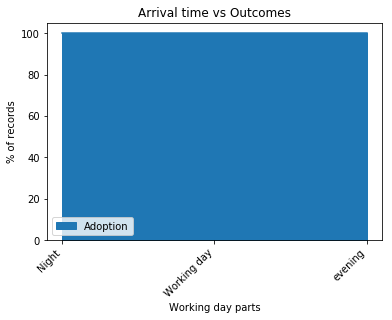

In [121]:
train_data['dayPart'] = train_data.DateTime.apply(workingShifts)

dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack()
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')
print(dayPart)
dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')

plt.ylabel("% of records")
plt.xlabel("Working day parts")

x_pos = [0, 1, 2]
plt.xticks(x_pos, ['Night','Working day', 'evening' ])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')



         Adoption
dayPart          
0           100.0
1           100.0
2           100.0
3           100.0


[None, None, None, None, None, None, None, None]

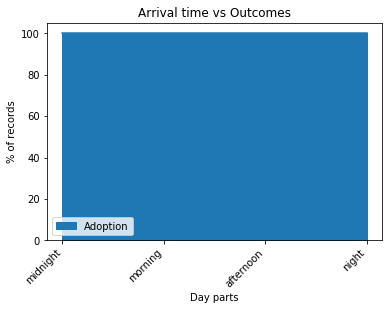

In [122]:
train_data['dayPart'] = train_data.DateTime.apply(dayPartOfArrivial)

dayPart = train_data[['dayPart','OutcomeType']].groupby(['dayPart', 'OutcomeType']).size().unstack()
dayPart = dayPart.apply(updateToPercentage, axis=1, result_type='expand')
print(dayPart)
dayPart.plot(kind='area',rot=30, title = 'Arrival time vs Outcomes')

plt.ylabel("% of records")
plt.xlabel("Day parts")

x_pos = [0, 1, 2, 3]

    
plt.xticks(x_pos, ['midnight', 'morning', 'afternoon' , 'night'])
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')



In [123]:
indexOfColumn = train_data.columns.get_loc('Breed')
noNanData = train_data.iloc[:, indexOfColumn]
uniqueBreeds = noNanData.value_counts()

numberOfOnceOcurringBreeds = uniqueBreeds.where(uniqueBreeds.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringBreeds = uniqueBreeds.where(uniqueBreeds.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringBreeds.size)
meanBreeds = uniqueBreeds.values.mean()
medianBreeds = uniqueBreeds.median()
print('There are {0} breeds that only occur once, that is a percentage of {1} of all breeds. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringBreeds.size, round(numberOfOnceOcurringBreeds.size / uniqueBreeds.size, 4)*100, round(numberOfOnceOcurringBreeds.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanBreeds)))
print('And the median of datapoints per breed is {0}'.format(medianBreeds))

902
There are 510 breeds that only occur once, that is a percentage of 55.86 of all breeds. 
Eventhough, it is only 0.4 percent of the total dataset
The average number of datapoints per breed is 13.0
And the median of datapoints per breed is 1.0


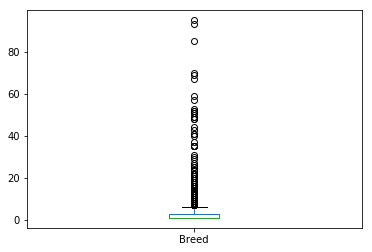

In [124]:
numberOfOnlyFewOcurringBreeds.plot.box()

Text(0.5, 0.98, 'Histogram of attribute "Breed"')

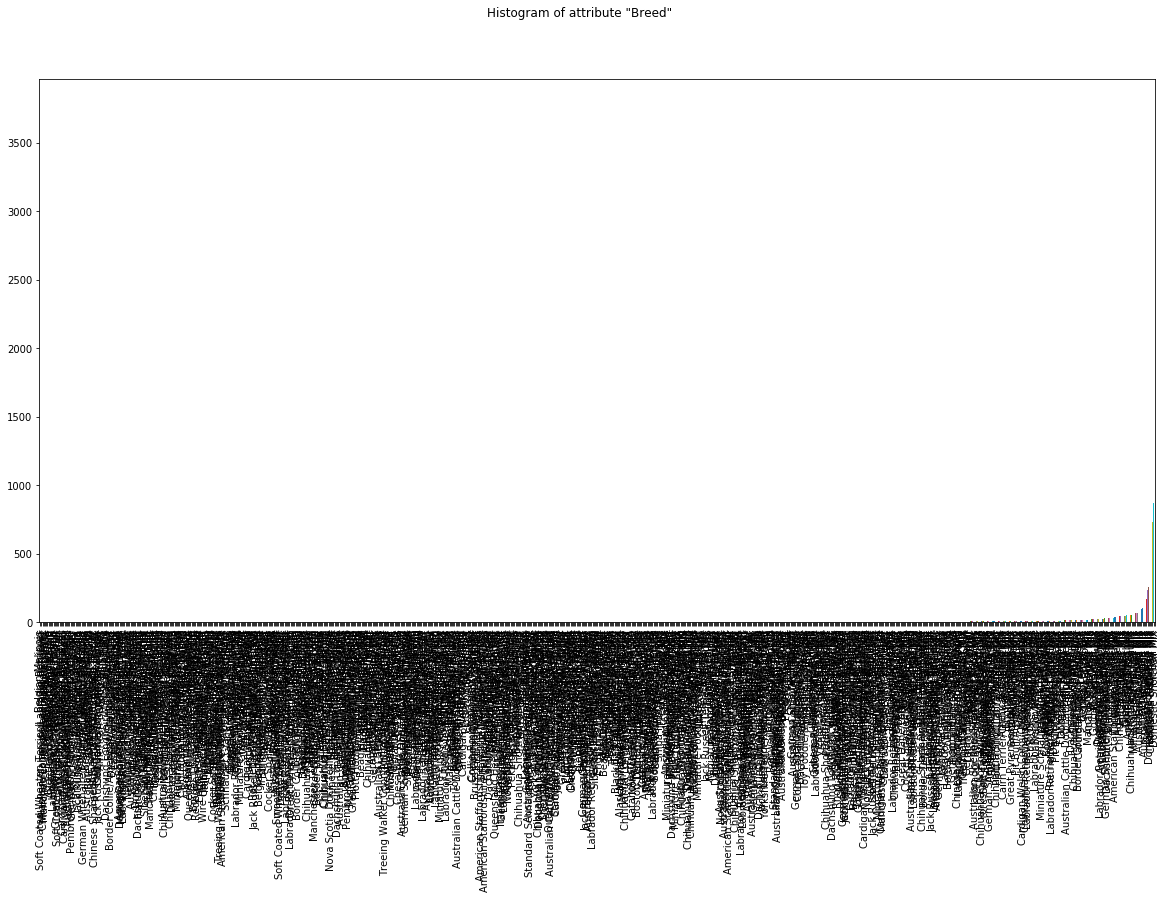

In [125]:
## Preparing the plots

fig = plt.figure(figsize=(20,10))
indexOfColumn = train_data.columns.get_loc('Breed')

## Filling the plots with histograms and boxplots
noNanData = train_data.iloc[:, indexOfColumn]
noNanData = noNanData.fillna("")
noNanData.value_counts().sort_values(axis='index').plot(kind='bar')

fig.suptitle('Histogram of attribute "{0}"'.format(train_data.columns[indexOfColumn]))


## Processing mixed breeds

In [126]:
breedValues = train_data['Breed'].value_counts()
rareBreedValues = breedValues[breedValues ==1].index
for breed in  rareBreedValues[:50]:
    print(breed)

Chihuahua Longhair/Queensland Heeler
Welsh Terrier/Wire Hair Fox Terrier
Queensland Heeler/Pit Bull
Miniature Poodle/West Highland
Alaskan Malamute/German Shepherd
Pit Bull/Jack Russell Terrier
Australian Terrier Mix
Black/Tan Hound/Siberian Husky
Labrador Retriever/Pug
Treeing Walker Coonhound
Flat Coat Retriever
Dutch Shepherd
Saluki/Doberman Pinsch
Bull Terrier Miniature Mix
German Shepherd/Basenji
Boxer/Queensland Heeler
Catahoula/Mastiff
Shih Tzu/Miniature Poodle
Beagle/Cardigan Welsh Corgi
Maltese/Yorkshire Terrier
Pug/Labrador Retriever
Beagle/Pit Bull
Vizsla/Dachshund
Schnauzer Giant Mix
Alaskan Malamute Mix
Catahoula/Treeing Walker Coonhound
Australian Shepherd/Dalmatian
Golden Retriever/Border Collie
Miniature Pinscher/Pug
Blue Lacy/Weimaraner
Jack Russell Terrier/Welsh Terrier
Labrador Retriever/Alaskan Malamute
Pekingese/Jack Russell Terrier
Brittany
Cairn Terrier/West Highland
Pug/Boston Terrier
Shiba Inu/Chinese Sharpei
Harrier/Pit Bull
Rottweiler/Australian Cattle Dog
Am

We see that a lot of breeds that only occur once consists of multiple breeds seperated by a slash sign. Also some breeds also have the word 'Mix' in them. This hints to the fact that there are not a purebred, but the mixed breeds are not specified. 

In [127]:
breedValues = train_data['Breed'].value_counts()
mixedBreedValues = train_data['Breed'].str.contains('mix', flags=re.IGNORECASE, regex=True)
print(train_data['Breed'].size)
print(train_data['Breed'][mixedBreedValues].size)
print(train_data['Breed'][mixedBreedValues].value_counts()[:10])

11456
9573
Domestic Shorthair Mix       3777
Pit Bull Mix                  870
Chihuahua Shorthair Mix       732
Labrador Retriever Mix        586
Domestic Medium Hair Mix      378
German Shepherd Mix           255
Domestic Longhair Mix         233
Siamese Mix                   173
Australian Cattle Dog Mix     146
Dachshund Mix                 119
Name: Breed, dtype: int64


## Filtering out inconsistent data
All the mixed breeds will be marked as a none purebred animal and the breed will be replaced by the named breed. We assume that the people who choose to adopt an animal will be influenced by the most present characteristics of a breed. 

In [128]:
processedDF['MixedBreed'] = mixedBreedValues
processedDF['Breed'] = train_data['Breed'].apply(lambda x : x.lower().replace('mix', '').strip())
processedDF.head(10)

,MixedBreed,Breed
0,True,labrador retriever
1,False,german shepherd/siberian husky
2,True,domestic shorthair
3,True,collie smooth
4,True,miniature poodle
5,True,beagle
6,True,domestic medium hair
7,True,domestic shorthair
8,False,cairn terrier
9,True,pit bull


Now the mixed breeds are processed, however a lot of animals are labeled with two breeds. Because each animal needs two animals as parents, all breeds can be splitted into two columns. A purebred animal will have both parentcolumns filled with the same breed. The mixed breed animals will processed as one known parent breed and one unkown. However, that information is already in the mixedBreed column, so we won't insert any values in the breed2 column in these cases.

In [129]:
def checkForMaxTwoBreeds(columnVal):
    splittedBreed = columnVal.split('/') 
    
    if(len(splittedBreed) > 2):
        print('\nError, more slices found for value: {0}'.format(splittedBreed))
    
    if 'black/tan hound' in columnVal.lower():
        columnVal = columnVal.lower().replace('black/tan hound', 'black tan hound').strip()
        print('Fixed value {0} by replacing it with "{1}"'.format(splittedBreed, columnVal))
    
    return columnVal

processedDF['Breed'] = processedDF['Breed'].apply(checkForMaxTwoBreeds)


Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"

Error, more slices found for value: ['german shepherd', 'black', 'tan hound']
Fixed value ['german shepherd', 'black', 'tan hound'] by replacing it with "german shepherd/black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"
Fixed value ['black', 'tan hound'] by replacing it with "black tan hound"

Error, more slices found for value: ['black', 'tan hound', 'siberian hu

In [132]:
def extractMultipleBreeds(row):
    splittedBreed = row['Breed'].split('/') 
    if(len(splittedBreed) > 2):
        print('Error, more slices found for value: {0}'.format(splittedBreed))
    elif len(splittedBreed) == 2:    
        row['Breed2'] = splittedBreed[1]
        row['Breed'] = splittedBreed[0]
    return row;

processedDF['Breed2'] = np.nan
processedDF = processedDF.apply(extractMultipleBreeds, axis=1, result_type='expand')
processedDF.head(20)

,MixedBreed,Breed,Breed2
0,True,labrador retriever,NaN
1,False,german shepherd,NaN
2,True,domestic shorthair,NaN
3,True,collie smooth,NaN
4,True,miniature poodle,NaN
5,True,beagle,NaN
6,True,domestic medium hair,NaN
7,True,domestic shorthair,NaN
8,False,cairn terrier,NaN
9,True,pit bull,NaN


In [133]:
print('Amount of unique unique second breeds for mixed breeds: {0}.'.format(processedDF['Breed2'].nunique()))
MultipleBreedsInBreed2 = processedDF['Breed2'].fillna(value = '').str.contains('/', flags=re.IGNORECASE, regex=True)
print('There are {0} rows that still contain multiple breeds.'.format(processedDF['Breed2'][MultipleBreedsInBreed2].size))

Amount of unique unique second breeds for mixed breeds: 0.
There are 0 rows that still contain multiple breeds.


In [134]:
breedUniques = processedDF['Breed'].value_counts()
singleDatapointBreeds = breedUniques.where(breedUniques.values.astype('int') == 1).dropna()
breedUniques2 = processedDF['Breed2'].value_counts()
singleDatapointBreeds2 = breedUniques2.where(breedUniques2.values.astype('int') == 1).dropna()

# using size property instead of the nunique() function because this prevents the unique function to be executed twice
# over the same column
print('There are {0} unique breeds of which {1} occur only in one datapoint.'.format(breedUniques.size, singleDatapointBreeds.size))
print('There are {0} unique cross breeds of which {1} occur only in one datapoint.'.format(breedUniques2.size, singleDatapointBreeds2.size))


There are 200 unique breeds of which 27 occur only in one datapoint.
There are 0 unique cross breeds of which 0 occur only in one datapoint.


## Breed preprocess rounding up
The dataset is now adjusted so the breed label is always the first named breed of the animal. In a new column, named Breed2, the animal breed is labled if it's mixed with specified breed. Each data point is extended with the label if it's a mixed breed.

## Convert cat and dog to binary form

In [135]:
print('Processing column "{0}"'.format(train_data.columns[5]))
print('The unique values in the column are: {0}'.format(train_data['AnimalType'].value_counts()))


processedDF['isCat'] = train_data['AnimalType'].str.startswith('C').astype('uint8')
print('Processed column "{0}"'.format(train_data.columns[5]))

processedDF.head()

Processing column "AgeuponOutcome"
The unique values in the column are: Dog    6656
Cat    4800
Name: AnimalType, dtype: int64
Processed column "AgeuponOutcome"


,MixedBreed,Breed,Breed2,isCat
0,True,labrador retriever,NaN,0
1,False,german shepherd,NaN,0
2,True,domestic shorthair,NaN,1
3,True,collie smooth,NaN,0
4,True,miniature poodle,NaN,0


## Process color values

In [136]:
indexOfColumnColor = train_data.columns.get_loc('Color')
noNanDataColor = train_data.iloc[:, indexOfColumnColor]
uniqueColor = noNanDataColor.value_counts()
numberOfOnceOcurringColors = uniqueColor.where(uniqueColor.values.astype('int') == 1).dropna()
numberOfOnlyFewOcurringColors = uniqueColor.where(uniqueColor.values.astype('int')< 100).dropna()
print(numberOfOnlyFewOcurringColors.size)
meanColors = uniqueColor.values.mean()
medianColors = uniqueColor.median()
print('There are {0} colors that only occur once, that is a percentage of {1} of all Colors. \nEventhough, it is only {2} percent of the total dataset'.format(numberOfOnceOcurringColors.size, round(numberOfOnceOcurringColors.size / uniqueColor.size, 4)*100, round(numberOfOnceOcurringColors.values.sum()/ train_data.size, 4)*100))
print('The average number of datapoints per breed is {0}'.format(round(meanColors)))
print('And the median of datapoints per breed is {0}'.format(medianColors))

248
There are 99 colors that only occur once, that is a percentage of 35.74 of all Colors. 
Eventhough, it is only 0.08 percent of the total dataset
The average number of datapoints per breed is 41.0
And the median of datapoints per breed is 3.0


Let's see if we can see if the data is in a standard format.

In [137]:

firstWordArray = np.array([])
secondWordArray = np.array([])

for val in uniqueColor.index:
    doubleColors = val.split('/') 
    for color in doubleColors:
        colorSplits = color.split(' ')
        firstWordArray = np.append(firstWordArray, colorSplits[0])
        if(len(colorSplits) == 2):
            secondWordArray = np.append(secondWordArray, colorSplits[1])
        
print(np.unique(firstWordArray))

print(np.unique(secondWordArray))
print()
print('There are {0} unique colors in the dataset'.format(uniqueColor.size))

print('It looks like that all double colors are seperated with a / \n{0} \n'.format(noNanDataColor[noNanDataColor.str.contains('/', flags=re.IGNORECASE, regex=True)][:10]))

print('And some colors are extended with the color pattern by a space followed by the pattern : \n{0} \n'.format(noNanDataColor[noNanDataColor.str.contains(' ', flags=re.IGNORECASE, regex=True)][:10]))

print('If we extract these values we have only {0} unique colors and {1} unique color patterns'.format(len(np.unique(firstWordArray)), len(np.unique(secondWordArray))))

#.contains('/', flags=re.IGNORECASE, regex=True)

['Agouti' 'Apricot' 'Black' 'Blue' 'Brown' 'Buff' 'Calico' 'Chocolate'
 'Cream' 'Fawn' 'Flame' 'Gold' 'Gray' 'Lilac' 'Liver' 'Lynx' 'Orange'
 'Pink' 'Red' 'Sable' 'Seal' 'Silver' 'Tan' 'Torbie' 'Tortie' 'Tricolor'
 'White' 'Yellow']
['Brindle' 'Cream' 'Merle' 'Point' 'Smoke' 'Tabby' 'Tick' 'Tiger']

There are 277 unique colors in the dataset
It looks like that all double colors are seperated with a / 
0             Red/White
1             Black/Tan
5           Brown/White
6     Brown Tabby/White
8           Black/Cream
9           Brown/White
10          White/Black
11           Blue/White
14          Black/Brown
16            Black/Tan
Name: Color, dtype: object 

And some colors are extended with the color pattern by a space followed by the pattern : 
2           Brown Tabby
6     Brown Tabby/White
7           Brown Tabby
12        Brown Brindle
25          Brown Tabby
26          Black Smoke
32          Brown Tabby
33    Brown Tabby/White
35      Red Merle/White
36          Brown Ta

In [138]:
def extractMultipleColorsAndTypes(row):
    colorRow = pd.Series() 
    colorRow['Color'] = None
    colorRow['ColorPattern'] = None
    colorRow['Color2'] = None
    colorRow['ColorPattern2'] = None

    splittedColors = row['Color'].split('/') 
    
    if len(splittedColors) >= 1:
        colorPattern = splittedColors[0].split(' ')
        colorRow['Color'] = colorPattern[0]
        if(len(colorPattern) >= 2):
            colorRow['ColorPattern'] = colorPattern[1]
            
    if len(splittedColors) >= 2:
        colorPattern = splittedColors[1].split(' ')
        colorRow['Color2'] = colorPattern[0]
        if(len(colorPattern) >= 2):
            if( colorRow['ColorPattern'] != None and str(colorRow['ColorPattern']) != colorPattern[1]):
                print('Multiple color patterns on same animal detected {0}'.format(splittedColors))
            colorRow['ColorPattern2'] = colorPattern[1]

    return colorRow;

newSeries = train_data.apply(extractMultipleColorsAndTypes, axis=1, result_type='expand')
newSeries.head(20)

Multiple color patterns on same animal detected ['Blue Merle', 'Brown Brindle']
Multiple color patterns on same animal detected ['Orange Tabby', 'Tortie Point']
Multiple color patterns on same animal detected ['Black Brindle', 'Blue Tick']
Multiple color patterns on same animal detected ['Brown Brindle', 'Blue Tick']
Multiple color patterns on same animal detected ['Brown Tabby', 'Black Brindle']
Multiple color patterns on same animal detected ['Blue Tabby', 'Blue Cream']


,Color,ColorPattern,Color2,ColorPattern2
0,Red,None,White,None
1,Black,None,Tan,None
2,Brown,Tabby,None,None
3,Tricolor,None,None,None
4,White,None,None,None
5,Brown,None,White,None
6,Brown,Tabby,White,None
7,Brown,Tabby,None,None
8,Black,None,Cream,None
9,Brown,None,White,None


In [139]:
#train_data['Color'].head(10)
#print(newSeries['ColorPattern'.size)
processedDF = pd.concat([processedDF,newSeries], axis=1)
processedDF.head(10)

,MixedBreed,Breed,Breed2,isCat,Color,ColorPattern,Color2,ColorPattern2
0,True,labrador retriever,NaN,0,Red,None,White,None
1,False,german shepherd,NaN,0,Black,None,Tan,None
2,True,domestic shorthair,NaN,1,Brown,Tabby,None,None
3,True,collie smooth,NaN,0,Tricolor,None,None,None
4,True,miniature poodle,NaN,0,White,None,None,None
5,True,beagle,NaN,0,Brown,None,White,None
6,True,domestic medium hair,NaN,1,Brown,Tabby,White,None
7,True,domestic shorthair,NaN,1,Brown,Tabby,None,None
8,False,cairn terrier,NaN,0,Black,None,Cream,None
9,True,pit bull,NaN,0,Brown,None,White,None


In [140]:
tempArray= np.empty([train_data['AgeuponOutcome'].size, 1])


In [141]:


for index, row in train_data['AgeuponOutcome'].iteritems():
    ageInDays = np.nan;
    if isinstance(row, str):
        ageInDays = 0;
        [value, ageType] = row.split(" ")
        #print(ageType)
        ## Get rid of the s in days, weeks etc. because some ageTypes are written without s in the dataset...
        if 'day' in ageType.lower():
            ageInDays += int(value)
        if 'week' in ageType.lower():
            ageInDays += int(value)*7
        if 'month' in ageType.lower():
             ageInDays += int(value)* round(365/12)
        if 'year' in ageType.lower():
            ageInDays += int(value) * 365        

    tempArray[index] = ageInDays

processedDF['AgeuponOutcome'] = tempArray


In [142]:
processedDF.head(100)

,MixedBreed,Breed,Breed2,isCat,Color,ColorPattern,Color2,ColorPattern2,AgeuponOutcome
0,True,labrador retriever,NaN,0,Red,None,White,None,300.0
1,False,german shepherd,NaN,0,Black,None,Tan,None,730.0
2,True,domestic shorthair,NaN,1,Brown,Tabby,None,None,365.0
3,True,collie smooth,NaN,0,Tricolor,None,None,None,120.0
4,True,miniature poodle,NaN,0,White,None,None,None,730.0
5,True,beagle,NaN,0,Brown,None,White,None,1095.0
6,True,domestic medium hair,NaN,1,Brown,Tabby,White,None,4745.0
7,True,domestic shorthair,NaN,1,Brown,Tabby,None,None,180.0
8,False,cairn terrier,NaN,0,Black,None,Cream,None,90.0
9,True,pit bull,NaN,0,Brown,None,White,None,365.0


In [143]:
print(tempArray)

[[ 300.]
 [ 730.]
 [ 365.]
 ...
 [ 365.]
 [2190.]
 [1460.]]


There are 2475 names that only occur once of the 3712 unique names.
0.6261374333228742


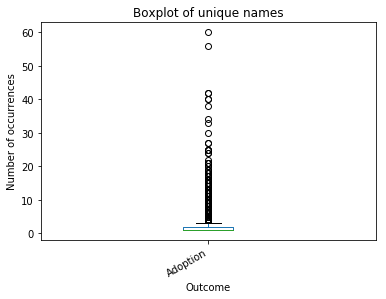

In [144]:
names = train_data[['Name','OutcomeType']].groupby([ 'Name', 'OutcomeType']).size().unstack()

countSingleOccurrence = 0
for name in names.itertuples():
    if sum(name[1:]) == 1:
        countSingleOccurrence = countSingleOccurrence + 1
        
names.plot.box( title='Boxplot of unique names')
plt.setp(plt.gca().get_xticklabels(), rotation=30, horizontalalignment='right')

plt.ylabel("Number of occurrences")
plt.xlabel("Outcome")
print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(3991 /6374)


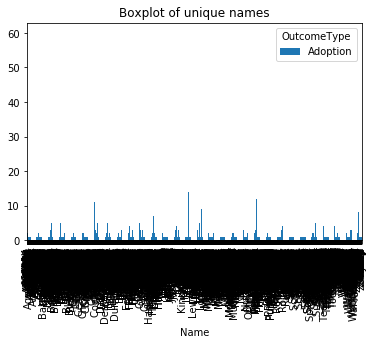

In [145]:
names.plot.bar( title='Boxplot of unique names')


There are 2475 names that only occur once of the 2 unique names.
              Adoption
isNameFilled          
False            100.0
True             100.0


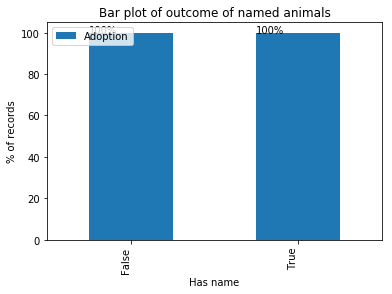

In [146]:
train_data['isNameFilled'] = np.invert(train_data['Name'].isnull())
names = train_data[['isNameFilled','OutcomeType']].groupby(['isNameFilled', 'OutcomeType']).size().unstack().fillna(0)
names = names.apply(updateToPercentage, axis=1, result_type='expand')

print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(names)

names.plot.bar( title='Bar plot of outcome of named animals')

plt.ylabel("% of records")
plt.xlabel("Has name")
plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')

ax = plt.gca()
ax.legend(loc='upper left')
for p in ax.patches:
    ax.annotate("%.0f" % (p.get_height())+'%', (p.get_x(), p.get_height()+ 0.005 ))

In [ ]:
train_data['isNameFilled'] = np.invert(train_data['Name'].isnull())
names = train_data[['isNameFilled','OutcomeType']].groupby(['isNameFilled', 'OutcomeType']).size().unstack().fillna(0)
names.plot.bar( title='Bar plot of outcome of named animals')

plt.ylabel("Number of occurrences")
plt.xlabel("Has name")
print('There are {0} names that only occur once of the {1} unique names.'.format(countSingleOccurrence, len(names)))
print(names)

In [147]:
processedDF['OutcomeType'] = train_data['OutcomeType']
processedDF['SexuponOutcome'] = train_data['SexuponOutcome']

processedDF['Name'] = np.invert(train_data['Name'].isnull())
processedDF.head()


,MixedBreed,Breed,Breed2,isCat,Color,ColorPattern,Color2,ColorPattern2,AgeuponOutcome,OutcomeType,SexuponOutcome,Name
0,True,labrador retriever,NaN,0,Red,None,White,None,300.0,Adoption,Intact Female,True
1,False,german shepherd,NaN,0,Black,None,Tan,None,730.0,Adoption,Spayed Female,True
2,True,domestic shorthair,NaN,1,Brown,Tabby,None,None,365.0,Adoption,Neutered Male,True
3,True,collie smooth,NaN,0,Tricolor,None,None,None,120.0,Adoption,Intact Male,True
4,True,miniature poodle,NaN,0,White,None,None,None,730.0,Adoption,Neutered Male,True


# Write to file

In [148]:
 processedDF.to_csv('../Datasets/preprocessed_test.csv')
